In [1]:
import pandas as pd
import numpy as np
import missingno as msn
import seaborn as sns
import matplotlib.pyplot
import re

In [3]:
# Load the dataset.

data = pd.read_csv('CourseraDataset-Unclean.csv')
data.head()

,Course Title,Rating,Level,Duration,Schedule,Review,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url
0,Fashion as Design,4.8,Beginner level,20 hours (approximately),Flexible schedule,"2,813 reviews",NaN,"['Art History', 'Art', 'History', 'Creativity']","['Introduction', 'Heroes', 'Silhouettes', 'Cou...","['Anna Burckhardt', 'Paola Antonelli', 'Michel...",['The Museum of Modern Art'],Arts and Humanities,https://www.coursera.org/learn/fashion-design
1,Modern American Poetry,4.4,Beginner level,Approx. 34 hours to complete,Flexible schedule,100 reviews,NaN,[],"['Orientation', 'Module 1', 'Module 2', 'Modul...",['Cary Nelson'],['University of Illinois at Urbana-Champaign'],Arts and Humanities,https://www.coursera.org/learn/modern-american...
2,Pixel Art for Video Games,4.5,Beginner level,9 hours (approximately),Flexible schedule,227 reviews,NaN,[],"['Week 1: Introduction to Pixel Art', 'Week 2:...","['Andrew Dennis', 'Ricardo Guimaraes']",['Michigan State University'],Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...
3,Distribución digital de la música independiente,NaN,Beginner level,Approx. 8 hours to complete,Flexible schedule,NaN,NaN,[],"['Semana 1', 'Semana 2', 'Semana 3', 'Semana 4']",['Eduardo de la Vara Brown.'],['SAE Institute México'],Arts and Humanities,https://www.coursera.org/learn/distribucion-di...
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Approx. 11 hours to complete,Flexible schedule,582 reviews,Students will be able to describe the blues as...,"['Music', 'Chord', 'Jazz', 'Jazz Improvisation']","['Blues Progressions – Theory and Practice ', ...",['Dariusz Terefenko'],['University of Rochester'],Arts and Humanities,https://www.coursera.org/learn/the-blues


In [10]:
data.shape

(9595, 13)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9595 entries, 0 to 9594
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Course Title         9595 non-null   object 
 1   Rating               8156 non-null   float64
 2   Level                8330 non-null   object 
 3   Duration             9333 non-null   object 
 4   Schedule             8912 non-null   object 
 5   Review               8152 non-null   object 
 6   What you will learn  4984 non-null   object 
 7   Skill gain           9595 non-null   object 
 8   Modules              9595 non-null   object 
 9   Instructor           9595 non-null   object 
 10  Offered By           9595 non-null   object 
 11  Keyword              9595 non-null   object 
 12  Course Url           9595 non-null   object 
dtypes: float64(1), object(12)
memory usage: 974.6+ KB


### Information about the dataset:
- There 9595 rows in the dataset.
- There are 13 columns in the dataset.

### Columns:
- 'Course Title': Data type is text/object. Doesn't contain missing values.
- 'Rating': Data type is numeric. Contain missing values.
- 'Level': Data type is text/object. Contain missing values.
- 'Duration': Data type is text/object. Contain missing values.
- 'Schedule': Data type is text/object. Contain missing values.
- 'Review': Data type is text/object. Contain missing values.
- 'What you will learn': Data type is text/object. Contain missing values.
- 'Skill gain': Data type is text/object. Doesn't contain missing values.
- 'Modules': Data type is text/object. Doesn't contain missing values.
- 'Instructor': Data type is text/object. Doesn't contain missing values.
- 'Offered By': Data type is text/object. Doesn't contain missing values.
- 'Keyword': Data type is text/object. Doesn't contain missing values.
- 'Course Url': Data type is text/object. Doesn't contain missing values.


In [12]:
# Checking duplicate values.
data.duplicated().sum()

900

### About duplicate values:
- There are 900 duplicate values. I will drop them all with dataset.drop_duplicates(inplace=True).

In [13]:
# Remove all duplicate values.
data.drop_duplicates(inplace=True)
# Checking duplicate values
data.duplicated().sum()

0

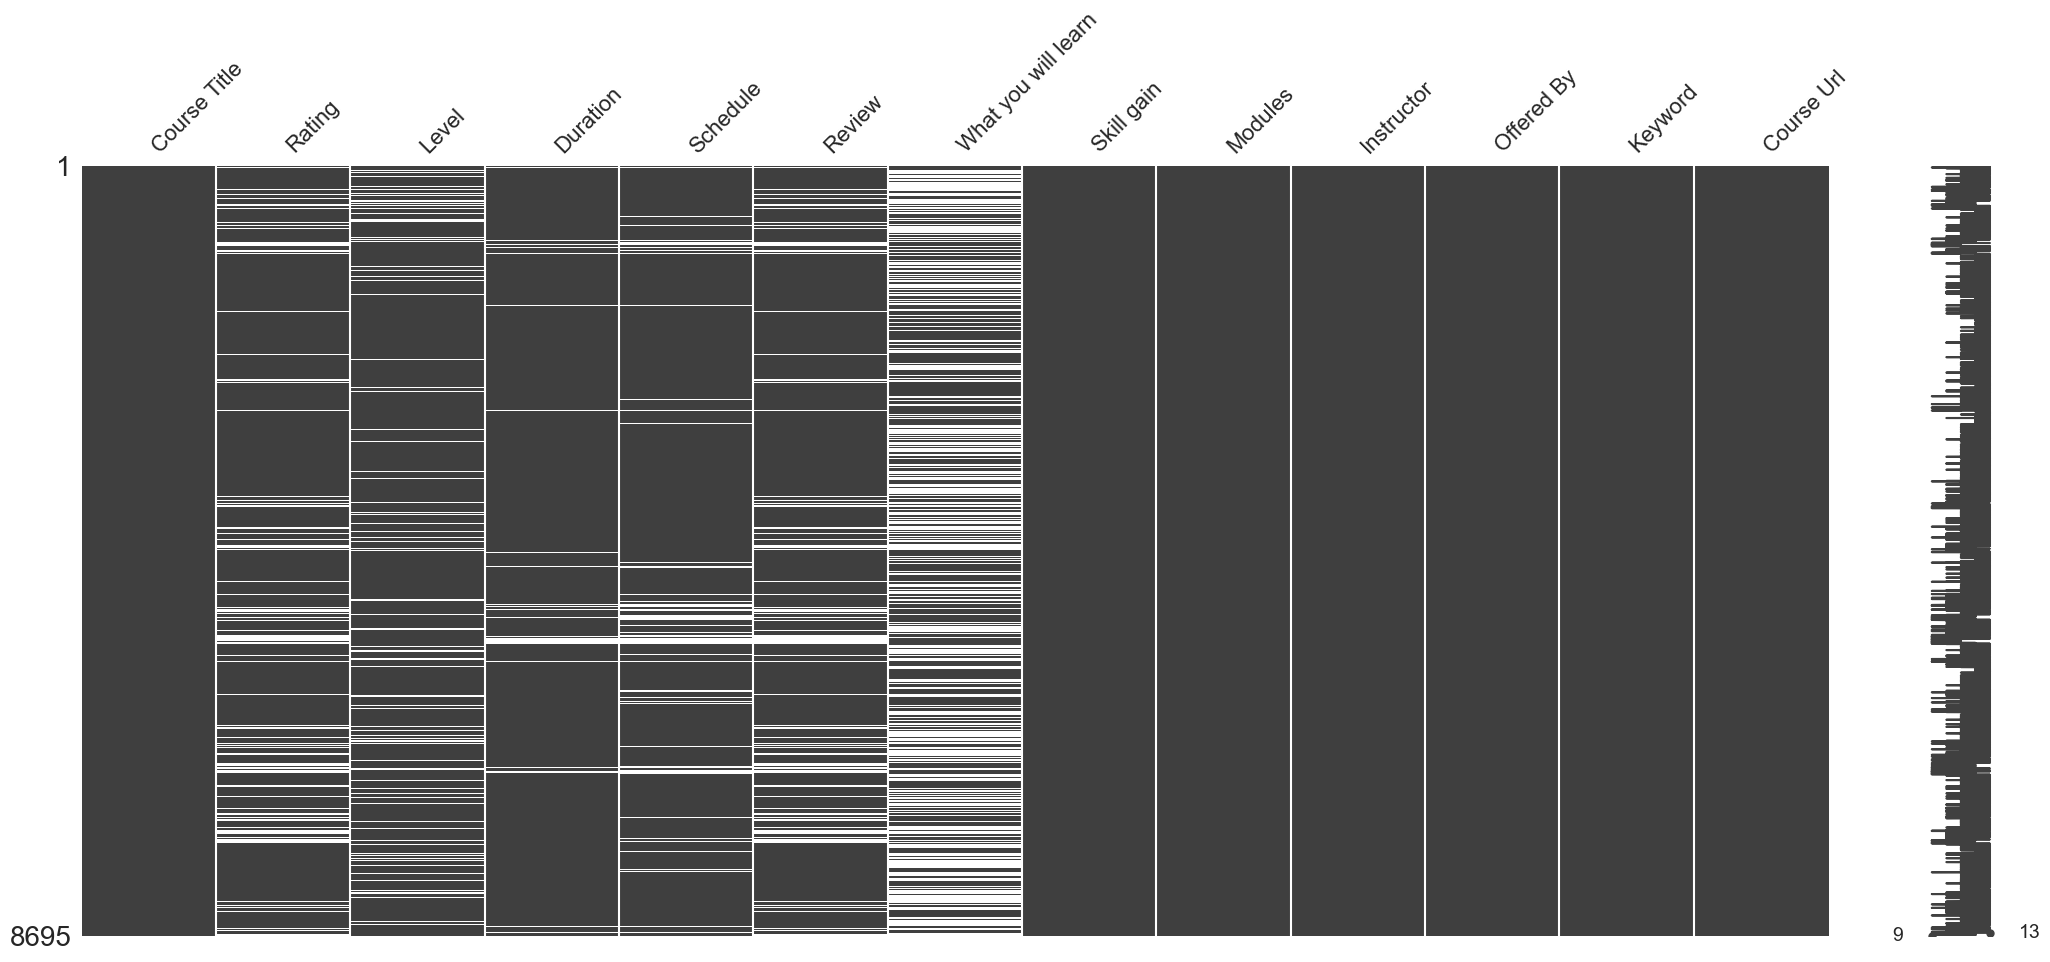

In [14]:
# Missing values. I will visualize missing values with missingno:
msn.matrix(data);

In [15]:
# Handling missing values for every column.

### Column: 'Rating'
rating_view = data.loc[:, ['Rating', 'Course Url']]
# rating_view #Uncomment if you want to look at the view.
# Let's check courses which doesn't have rating.
# Nobody rate these (Which doesn't have rating) courses because of that their values are NaN.
data['Rating'].fillna(0, inplace=True) # I will fill missing values with 0.

### Column: 'Level'
level_view = data.loc[:, ['Level', 'Course Url']]
# level_view

# There are no information about level in the website. I replace all NaN values with 'Not specified'.
data['Level'].fillna('Not specified', inplace=True)

### Column: 'Duration'
duration_view = data.loc[:, ['Duration', 'Course Url']]
# duration_view
# This column has missing values because of the scraper. Some courses duration is given by minutes or hours (but in another language). For now let's keep these rows. Later I will decide what will I do for this column.

### Column: 'Schedule'
schedule_view = data.loc[:, ['Schedule', 'Course Url']]
# schedule_view

# After looking at the courses I can replace missing values with 'Hands-on learning'.
data['Schedule'].fillna('Hands-on learning', inplace=True)

### Column: 'Review'
review_view = data.loc[:, ['Rating', 'Review', 'Course Url']]
# review_view
# If no one rate the course there will be no review.
data['Review'].fillna('0 reviews', inplace=True) # I will fill missing values with '0 reviews.'

### Column: 'What you will learn'
w_y_w_l_view = data.loc[:, ['What you will learn', 'Course Url']]
# w_y_w_l_view
# There are no information about what you will learn in the website. I replace all NaN values with 'Not specified'.

data['What you will learn'].fillna('Not specified', inplace=True)

In [18]:
# As I said, there are missing values in 'Duration' column because of the scraper. Scraper just extarch data with hours (in English). When I check courses which has no duration I saw that durations are given by with minues or in another language.

number_of_nan_duration = data['Duration'].isna().sum()
print(number_of_nan_duration)

# There 241 missing values in Duration column. I will drop them all.
data.dropna(subset=['Duration'], inplace=True)

241


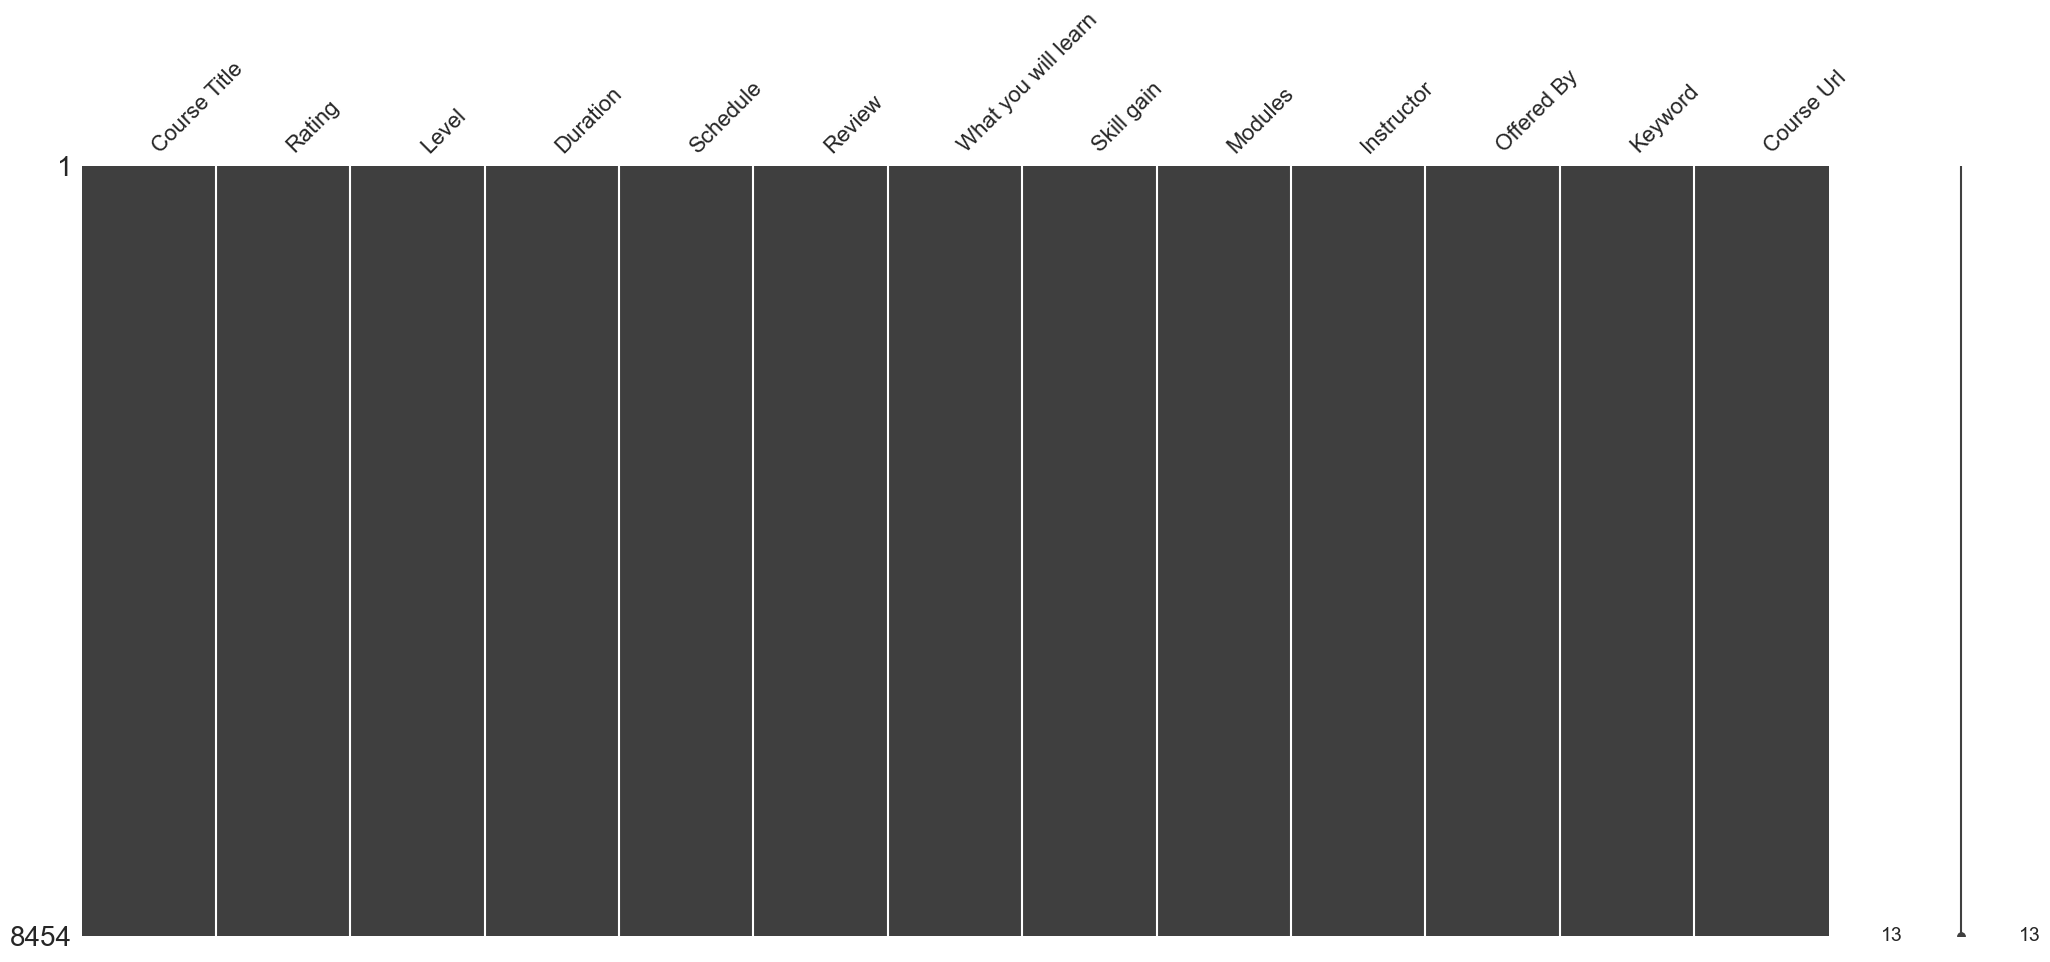

In [19]:
# Check missing values.
msn.matrix(data);

In [21]:
data.shape

(8454, 13)

In [22]:
# Three columns: 'Skill gain', 'Modules', and 'Instructor'  and 'Offered By' values are in lists. I will correct these columns.
def remove_brackets(dataset, col, pattern, replace_=''):
    new_c = []
    for c in dataset[col]:
        result_string = re.sub(pattern, replace_, c)
        new_c.append(result_string)

    dataset[col] = new_c
    return dataset

pattern = r"[\[\]\']"
data = remove_brackets(data, 'Skill gain', pattern)
data = remove_brackets(data, 'Modules', pattern)
data = remove_brackets(data, 'Instructor', pattern)
data = remove_brackets(data, 'Offered By', pattern)

In [23]:
# There are missing values in 'Skill gain' columns (Meaning of '' is missing values).
skill_gain_view = data.loc[:, ['Skill gain', 'Course Url']]
# skill_gain_view
# There are no information about what skills you gain from the course in the website. I replace all '' values with 'Not specified'.
data['Skill gain'] = data['Skill gain'].replace('', 'Not specified')

In [32]:
# I will extract hours from Duration column.
n = 0
for i in data['Duration']:
    if 'hour' in i:
        n += 1

print(data.shape[0] == n)
# I check if every row contain hours.

True


In [76]:
# Correcting 'Duration' column. In some values are given by 'one', 'two' etc. I will drop them too (There 75 values like that).

hours_to_finish = []
for d in data['Duration']:
    digit_ = 0
    for i in d.split():
        if i.isdigit():
            digit_ += 1

    if digit_ > 0:
        if 'month' in d:
            week_size = int(d[:d.find('month')]) * 4
            for wh in d[d.find('month'):].split():
                if wh.isdigit():
                    h = int(wh)
                    hours_to_finish.append(week_size * h)
                    break

        elif 'hour' in d:
            if 'min' in d:
                h = int(d[:d.find('hour')])
                for m in d[d.find('hour'):].split():
                    if m.isdigit():
                        hours_to_finish.append(h + (int(m) / 60))
                        break
            else:
                for wh in d[:d.find('hour')].split():
                    if wh.isdigit():
                        h = int(wh)
                        hours_to_finish.append(h)
                        break
    else:
        hours_to_finish.append(np.nan)

data['Duration to complete (Approx.)'] = hours_to_finish
data.dropna(subset=['Duration to complete (Approx.)'], inplace=True)

# I can drop the old column.
data.drop(['Duration'], axis=1, inplace=True)

In [86]:
# Reviews column.
new_reviews = []
for r in data['Review']:
    new_reviews.append(int(''.join(r.split()[0].split(','))))
data['Number of Review'] = new_reviews

#data.loc[:, ['Review', 'Number of Review']]
data.drop(['Review'], axis=1, inplace=True)

In [95]:
data.head()

,Course Title,Rating,Level,Schedule,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url,Duration to complete (Approx.),Number of Review
0,Fashion as Design,4.8,Beginner level,Flexible schedule,Not specified,"Art History, Art, History, Creativity","Introduction, Heroes, Silhouettes, Coutures, L...","Anna Burckhardt, Paola Antonelli, Michelle Mil...",The Museum of Modern Art,Arts and Humanities,https://www.coursera.org/learn/fashion-design,20.0,2813
1,Modern American Poetry,4.4,Beginner level,Flexible schedule,Not specified,Not specified,"Orientation, Module 1, Module 2, Module 3, Mod...",Cary Nelson,University of Illinois at Urbana-Champaign,Arts and Humanities,https://www.coursera.org/learn/modern-american...,34.0,100
2,Pixel Art for Video Games,4.5,Beginner level,Flexible schedule,Not specified,Not specified,"Week 1: Introduction to Pixel Art, Week 2: Pix...","Andrew Dennis, Ricardo Guimaraes",Michigan State University,Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...,9.0,227
3,Distribución digital de la música independiente,0.0,Beginner level,Flexible schedule,Not specified,Not specified,"Semana 1, Semana 2, Semana 3, Semana 4",Eduardo de la Vara Brown.,SAE Institute México,Arts and Humanities,https://www.coursera.org/learn/distribucion-di...,8.0,0
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Flexible schedule,Students will be able to describe the blues as...,"Music, Chord, Jazz, Jazz Improvisation","Blues Progressions – Theory and Practice , Blu...",Dariusz Terefenko,University of Rochester,Arts and Humanities,https://www.coursera.org/learn/the-blues,11.0,582


In [96]:
data.to_csv('CourseraDataset-Clean.csv', index=False)